# **Business Understanding**

**1.1   Objective**

Prediksi obat menggunakan metode klasifikasi Random Forest

**1.2   Description**

Pengobatan sendiri (self medication) merupakan upaya yang paling banyak dilakukan masyarakat untuk mengatasi keluhan atau gejala penyakit sebelum mereka memutuskan mencari pertolongan ke pusat pelayanan kesehatan/petugas kesehatan. 

Tapi ada keuntungan dan kekurangan dalam proses self medication, maka dari itu dalam membuat sebuah machine learning diperlukan data yang valid dan proses yang benar.

Kami menghadirkan sebuah machine learning berbasis python yang akan menunjang self medication dalam memberikan pertolongan pertama khususnya dalam pemilihan obat berdasarkan karakteristik karakteristik yang dimiliki oleh pasien








In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**

**2.1 Import Library**

Hal yang perlu dilakukan adalah meng import library/modul apa yang akan dipakai, agar memudahkan modul-modul tersebut kami letakkan di dalam 1 cell

In [208]:
# untuk membaca dataset ke pandas DataFrame
import pandas as pd
 
# Numpy digunakan untuk mengonversi ke array
import numpy as np
from numpy.ma.core import filled
 
# Untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns
 
# Modelling helper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Model algoritma yang dipakai
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import pickle

**2.2 Load Data**

Data yang kami gunakan telah tersimpan di gdrive, jadi untuk lokasinya menyesuaikan yang ada di gdrive. Untuk header kami beri None agar nanti bisa disesuaikan lagi dengan atribut yang ada

In [209]:
df = pd.read_csv('/content/drive/My Drive/Data Science/drug200 v2.csv', header = None)
df.head()

,0,1,2,3,4,5
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**2.3 Inisiasikan Nama Kolom**

Nama kolom pada data sebelumnya masih berbentuk numerik, maka dari itu kami menginisialisasikan nama kolomnya dengan 6 Atribut yaitu: Age, Sex, BP, Colesterol, Na_to_K dan Drug.


Deskripsi variabel:

*   Age = Umur pasien
*   Sex = Jenis kelamin pasien
*   BP = Tekanan darah pasien (Blood Presure)
*   Cholesterol = Level kolesterol pasien
*   Na_to_K = Rasio Na_to_K Pasien

In [210]:
df.columns = ['Age',
              'Sex',
              'BP',
              'Cholesterol',
              'Na_to_K',
              'Drug']
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**2.4 Check Tipe data Tiap Kelas**

Sebelum ke pembagian data, kita perlu tahu terlebih dahulu tipe data apa saja yang ada di dataset Drug

In [211]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [212]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [213]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [214]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [215]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

**2.5 Check Apakah Terdapat Missing Value**

Kami juga cek berapa banyak missing value atau data yang hilang, missing value sendiri itu ada 3 tipenya:
*   Hilang Sepenuhnya Secara Acak (MCAR, Missing Completely At Random)
*   Hilang Secara Acak (MAR, Missing At Random)
*   Hilang Tidak Secara Acak (MNAR, Missing Not At Random)

Penanganan:
*   Menghapus Keseluruhan Baris (Row): membuang kolom / baris yang datanya tidak tersedia.
*   Menghitung Nilai Pengganti (Imputation)

In [216]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**2.6 Tamplikan Jumlah data selain missing value**

Dari pengecekan diatas, dapat diketahui bahwa data Drug yang kami gunakan tidak memiliki missing value

In [217]:
len(df)

200

# **Data Preparation**

In [218]:
# Cek tipe data terbaru
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

**3.1 Label Encoder**

Kami menggunakan metode ini untuk merepresentasikan data tipe categorical ke bentuk numerical

In [219]:
encoder = LabelEncoder()

In [220]:
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df['Drug'] = encoder.fit_transform(df['Drug'])

In [221]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [222]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

**3.2 Drop data Drug**

Data Drug perlu dipisahkan dengan data asli, karena data drug ini yang akan kami jadikan sebagai label

In [223]:
# Menghapus data drug dari data asli, dan menginisialisasi data tanpa data drug
X = df.drop('Drug', axis = 1).copy()
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [224]:
# Menginisialisasikan data drug ke variabel y
Y = df['Drug'].copy()
Y.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int64

**3.3 Train Test Split**

Lakukan Split data antara data Training dan data testing dengan perbandingan 80:20 %. 80% untuk data training dan 20% untuk data testing, untuk mengatur bisa dari test_size=(persentase data testing).


Pemanggilan train test split akan membutuhkan 4 buah variabel, maka dari itu kami menyediakan 4 buah variabel yaitu X_train, X_test, Y_train, Y_test


In [225]:
# Membagi dataset menjadi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

# **Modelling**

**4.1 Random Forest Model Classification**

Perlu mengimportkan modul terlebih dahulu yaitu RandomForestClassifier agar klasifikasi berjalan dengan baik sesuai algoritma yang dipilih.

In [226]:
# Klasifikasi pakai random forest
clf_dt = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=0)

# Inisialisasikan hasil klasifikasi
clf_dt = clf_dt.fit(X_train, Y_train)

In [227]:
clf_dt = clf_dt.estimators_

In [228]:
# Menampilkan data training
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
134,42,0,0,0,21.036
66,29,1,0,0,12.856
26,31,1,0,0,30.366
113,65,0,1,1,13.769
168,51,0,1,1,23.003
...,...,...,...,...,...
67,17,1,2,1,10.832
192,72,1,1,0,16.310
117,40,0,2,0,10.103
47,68,1,1,0,10.291


In [229]:
# Menampilkan data testing
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
18,23,1,1,0,7.298
170,28,0,2,0,12.879
107,42,1,1,0,20.013
98,20,1,0,1,35.639
177,25,1,2,0,19.011
182,20,0,1,1,11.686
5,22,0,2,0,8.607
146,37,0,1,1,12.006
12,43,1,1,0,15.376
152,55,1,2,1,7.261


In [230]:
Y_train

134    0
66     1
26     0
113    4
168    0
      ..
67     4
192    0
117    4
47     3
172    0
Name: Drug, Length: 160, dtype: int64

In [231]:
Y_test

18     3
170    4
107    0
98     0
177    0
182    4
5      4
146    4
12     0
152    4
61     1
125    0
180    0
154    0
80     2
7      3
33     0
130    0
37     4
74     0
183    0
145    4
45     4
159    4
60     0
123    0
179    0
185    0
122    0
44     4
16     4
55     3
150    1
111    4
22     0
189    0
129    4
4      0
83     1
106    4
Name: Drug, dtype: int64

In [232]:
clf_dt

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=209652396),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=398764591),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=924231285),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=441365315),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=192771779),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

In [233]:
len(clf_dt)

30

In [234]:
# Create Random Forest classifer object
clf = RandomForestClassifier()

# Train Random Forest Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# **Evaluation**

**5.1 Visualisasi pohon**

Visualisasikan pohon keputusan dari klasifikasi metode random forest

[Text(895.125, 489.24, 'X[2] <= 0.5\nentropy = 1.901\nsamples = 102\nvalue = [78, 17, 11, 12, 42]'),
 Text(488.25, 380.52000000000004, 'X[4] <= 14.698\nentropy = 1.403\nsamples = 43\nvalue = [37, 17, 11, 0, 0]'),
 Text(325.5, 271.8, 'X[0] <= 52.5\nentropy = 0.967\nsamples = 22\nvalue = [0, 17, 11, 0, 0]'),
 Text(162.75, 163.08000000000004, 'entropy = 0.0\nsamples = 13\nvalue = [0, 17, 0, 0, 0]'),
 Text(488.25, 163.08000000000004, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 11, 0, 0]'),
 Text(651.0, 271.8, 'entropy = 0.0\nsamples = 21\nvalue = [37, 0, 0, 0, 0]'),
 Text(1302.0, 380.52000000000004, 'X[3] <= 0.5\nentropy = 1.421\nsamples = 59\nvalue = [41, 0, 0, 12, 42]'),
 Text(976.5, 271.8, 'X[4] <= 14.615\nentropy = 1.52\nsamples = 31\nvalue = [22, 0, 0, 12, 12]'),
 Text(813.75, 163.08000000000004, 'X[2] <= 1.5\nentropy = 1.0\nsamples = 15\nvalue = [0, 0, 0, 12, 12]'),
 Text(651.0, 54.360000000000014, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 0, 12, 0]'),
 Text(976.5, 54.3600000000000

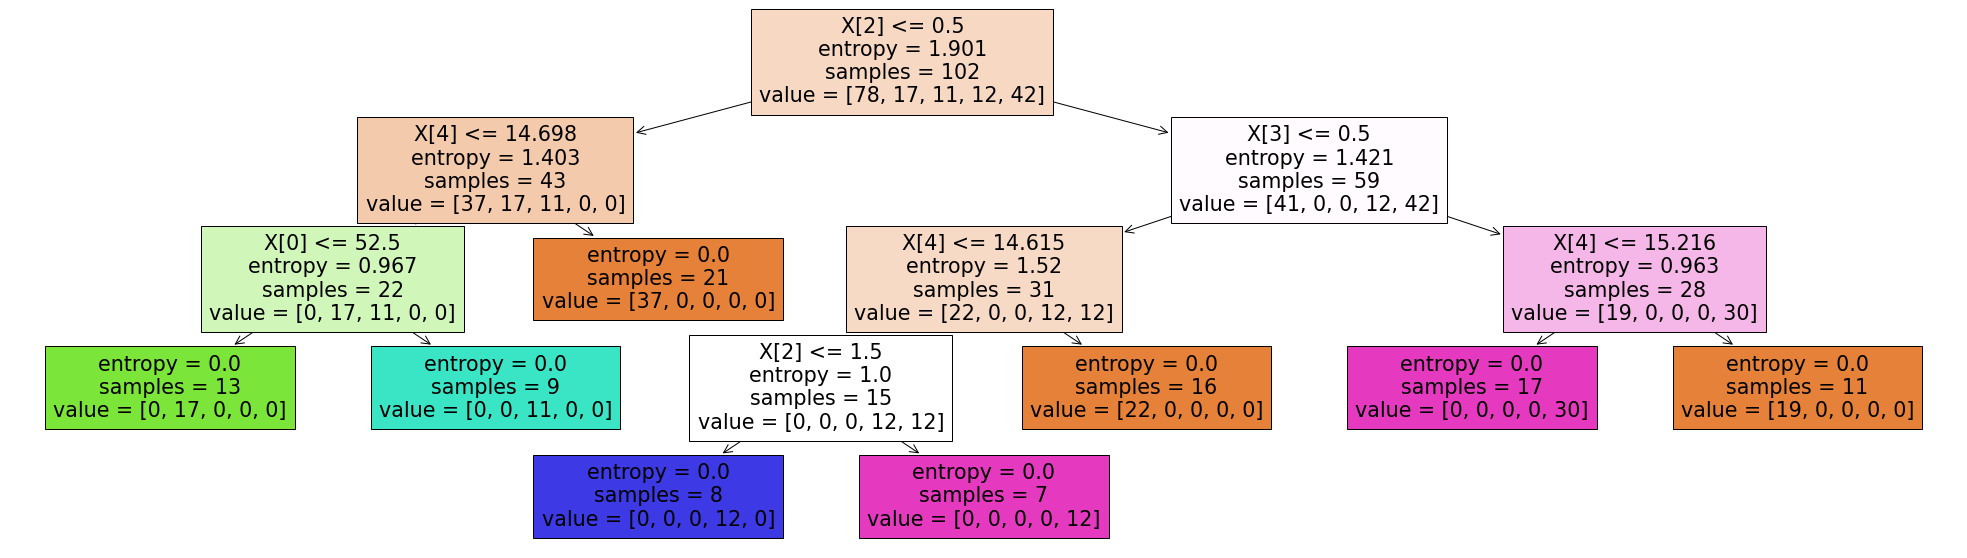

In [235]:
plt.figure(figsize=(35,10))
tree.plot_tree(clf_dt[0],filled= True)

[Text(767.25, 489.24, 'BP <= 0.5\nentropy = 1.901\nsamples = 102\nvalue = [78, 17, 11, 12, 42]\nclass = DrugX'),
 Text(418.5, 380.52000000000004, 'Na_to_K <= 14.698\nentropy = 1.403\nsamples = 43\nvalue = [37, 17, 11, 0, 0]\nclass = DrugX'),
 Text(279.0, 271.8, 'Age <= 52.5\nentropy = 0.967\nsamples = 22\nvalue = [0, 17, 11, 0, 0]\nclass = drugA'),
 Text(139.5, 163.08000000000004, 'entropy = 0.0\nsamples = 13\nvalue = [0, 17, 0, 0, 0]\nclass = drugA'),
 Text(418.5, 163.08000000000004, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 11, 0, 0]\nclass = drugB'),
 Text(558.0, 271.8, 'entropy = 0.0\nsamples = 21\nvalue = [37, 0, 0, 0, 0]\nclass = DrugX'),
 Text(1116.0, 380.52000000000004, 'Cholesterol <= 0.5\nentropy = 1.421\nsamples = 59\nvalue = [41, 0, 0, 12, 42]\nclass = drugY'),
 Text(837.0, 271.8, 'Na_to_K <= 14.615\nentropy = 1.52\nsamples = 31\nvalue = [22, 0, 0, 12, 12]\nclass = DrugX'),
 Text(697.5, 163.08000000000004, 'BP <= 1.5\nentropy = 1.0\nsamples = 15\nvalue = [0, 0, 0, 12, 12]

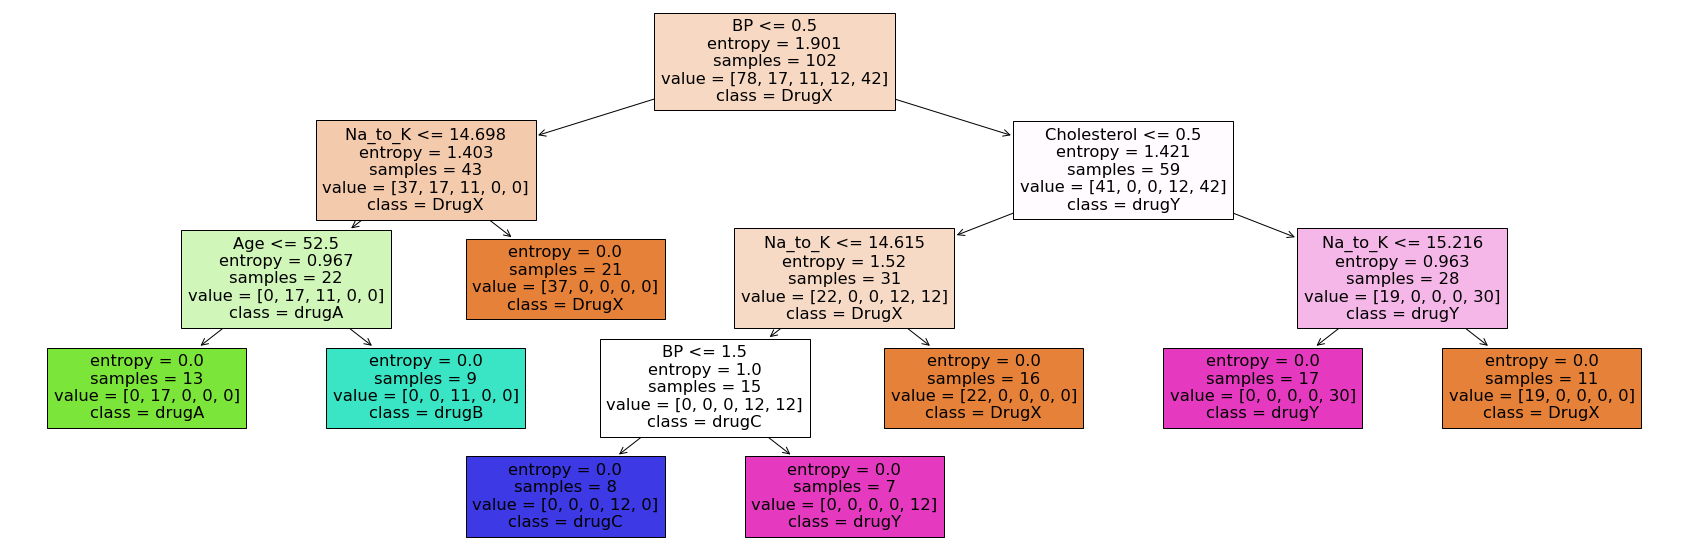

In [236]:
plt.figure(figsize=(30,10))
tree.plot_tree(clf_dt[0],filled= True, feature_names = X.columns,class_names=["DrugX","drugA","drugB","drugC","drugY" ])

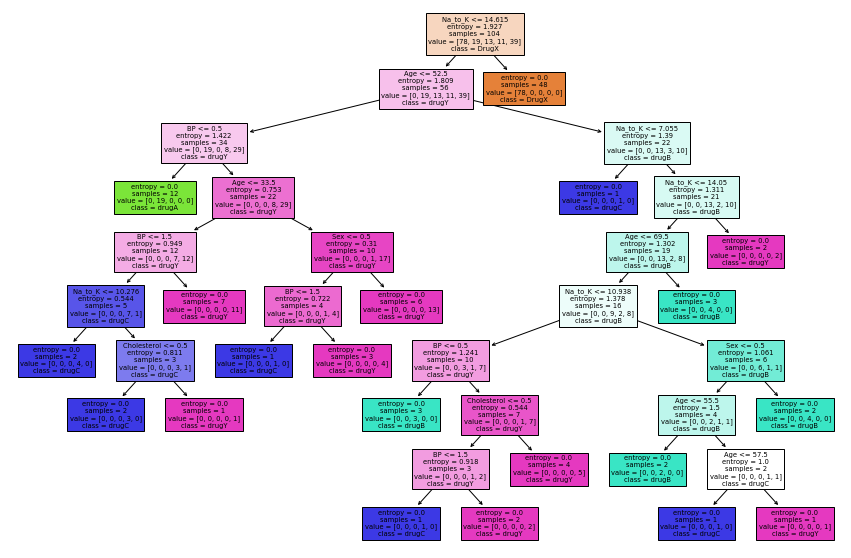

In [196]:
plt.figure(figsize=(15,10))
for i in range(len(clf_dt)):
  tree.plot_tree(clf_dt[i],filled =True, feature_names = X.columns,class_names=["DrugX","drugA","drugB","drugC","drugY" ] )

[Text(383.625, 489.24, 'BP <= 0.5\nentropy = 1.901\nsamples = 102\nvalue = [78, 17, 11, 12, 42]\nclass = DrugX'), Text(209.25, 380.52000000000004, 'Na_to_K <= 14.698\nentropy = 1.403\nsamples = 43\nvalue = [37, 17, 11, 0, 0]\nclass = DrugX'), Text(139.5, 271.8, 'Age <= 52.5\nentropy = 0.967\nsamples = 22\nvalue = [0, 17, 11, 0, 0]\nclass = drugA'), Text(69.75, 163.08000000000004, 'entropy = 0.0\nsamples = 13\nvalue = [0, 17, 0, 0, 0]\nclass = drugA'), Text(209.25, 163.08000000000004, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 11, 0, 0]\nclass = drugB'), Text(279.0, 271.8, 'entropy = 0.0\nsamples = 21\nvalue = [37, 0, 0, 0, 0]\nclass = DrugX'), Text(558.0, 380.52000000000004, 'Cholesterol <= 0.5\nentropy = 1.421\nsamples = 59\nvalue = [41, 0, 0, 12, 42]\nclass = drugY'), Text(418.5, 271.8, 'Na_to_K <= 14.615\nentropy = 1.52\nsamples = 31\nvalue = [22, 0, 0, 12, 12]\nclass = DrugX'), Text(348.75, 163.08000000000004, 'BP <= 1.5\nentropy = 1.0\nsamples = 15\nvalue = [0, 0, 0, 12, 12]\ncla

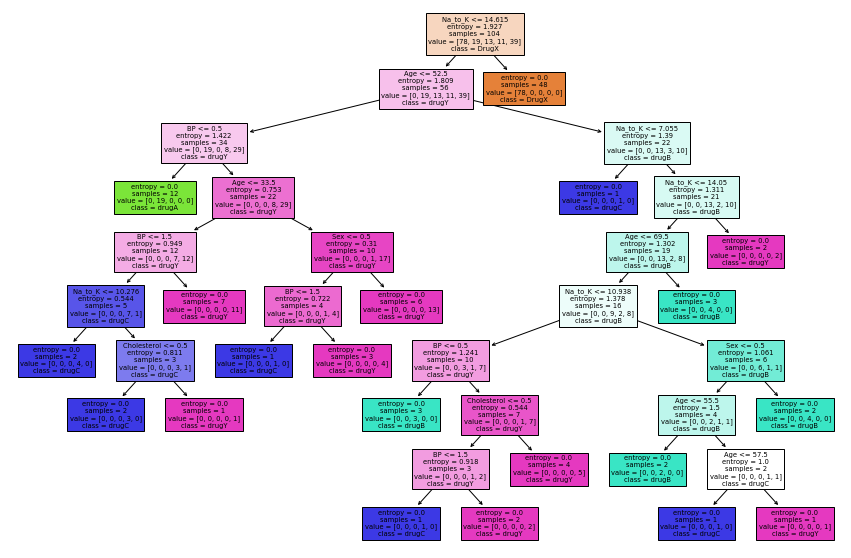

In [197]:
plt.figure(figsize=(15,10))
for i in range(len(clf_dt)):
  print(tree.plot_tree(clf_dt[i],filled =True, feature_names = X.columns,class_names=["DrugX","drugA","drugB","drugC","drugY" ]))

In [198]:
plt.figure(figsize=(15,10))
for i in range(len(clf_dt)):
  print(tree.export_text(clf_dt[i]))

|--- feature_2 <= 0.50
|   |--- feature_4 <= 14.70
|   |   |--- feature_0 <= 52.50
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  52.50
|   |   |   |--- class: 2.0
|   |--- feature_4 >  14.70
|   |   |--- class: 0.0
|--- feature_2 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_4 <= 14.62
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: 3.0
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- class: 4.0
|   |   |--- feature_4 >  14.62
|   |   |   |--- class: 0.0
|   |--- feature_3 >  0.50
|   |   |--- feature_4 <= 15.22
|   |   |   |--- class: 4.0
|   |   |--- feature_4 >  15.22
|   |   |   |--- class: 0.0

|--- feature_2 <= 0.50
|   |--- feature_4 <= 14.56
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_4 <= 10.12
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_4 >  10.12
|   |   |   |   |--- class: 1.0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_0 <= 50.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  50.00


<Figure size 1080x720 with 0 Axes>

In [199]:
# Buat objek Random Forest classifer
clf = RandomForestClassifier()

# Train Random Forest Classifer
clf = clf.fit(X_train,Y_train)

# Prediksi respon dari hasil testing
Y_pred = clf.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [200]:
# Model Accuracy, seberapa besar akurasi yang didapat
print("Accuracy: %0.2f" % (100* metrics.accuracy_score(Y_test, Y_pred)),'%')

Accuracy: 100.00 %


**5.2 Tampilan confussion matriks**

Menampilkan confussion matriks untuk melihat nilai tertinggi dan terkecil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


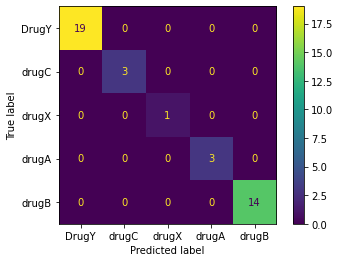

In [201]:
# Import modul plot_confusion_matrix terlebih dahulu (modul ada di cell atas)
plot_confusion_matrix(clf, X_test, Y_test, display_labels=["DrugY", "drugC", "drugX", "drugA", "drugB"])

**5.3 Tampilan korelasi dengan diagram heatmap**

Untuk mengetahui mana yang paling dan tidak berpengaruh di tiap tiap atribut

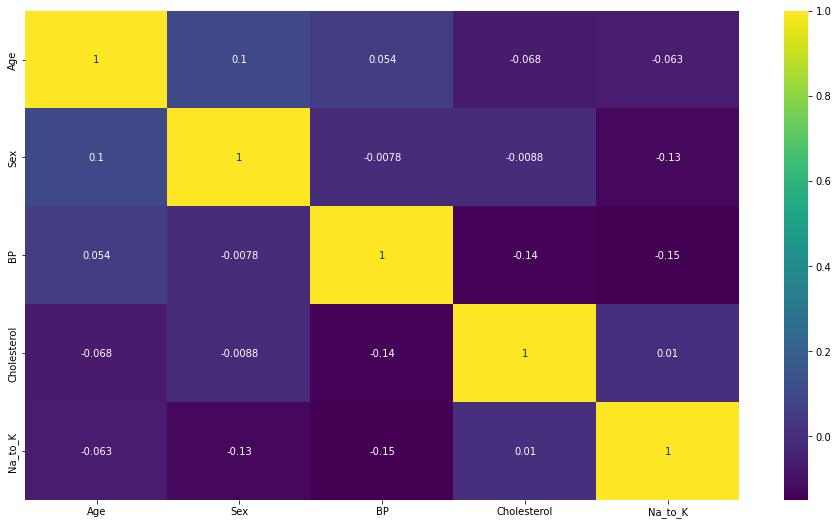

In [202]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(X.corr(),annot = True,cmap = 'viridis')
plt.show()

# **Deployment**

In [203]:
pickle_out = open("trained_model.pkl", mode="wb")
pickle.dump(clf, pickle_out)
pickle_out.close()

# **Prediction**

**Membuat Model Prediksi**

**dengan input value sebagai berikut:**

1. **Age**
2. **Sex**

      dengan rincian labeling sebagai berikut:
          Female = 0
          male   = 1
3. **BP**

      dengan rincian labeling sebagai berikut:
          Low      = 1
          Normal   = 2
          High     = 0

4. **Cholesterol**

      dengan rincian labeling sebagai berikut:
          Normal   = 1
          High     = 0

5. **Na_to_K**
          
untuk Urutan Input data adalah (Age, Sex, BP, Cholesterol, Na_to_K)

In [204]:
# Input_data = (23,"F","HIGH","HIGH",25.355,"DrugY")

#Kita coba untuk menampilakn prediksi obat menggunakan baris no 1 untuk test apakah sudah berjalan dengan baik
# seharsnya akan didapatkan hasil drugs = 0 (Drugs Y)

input_data =(23, 0, 0, 0, 25.355)


#ubah input data menjadi array

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Prediction = clf.predict(input_data_reshaped)

print(Prediction)

if (Prediction[0]== 0):
  print("terklasifikasi Drugs Y")
if (Prediction[0]== 1):
  print("terklasifikasi Drugs A")
if (Prediction[0]== 2):
  print("terklasifikasi Drugs B")
if (Prediction[0]== 3):
  print("terklasifikasi Drugs C")
if (Prediction[0]== 4):
  print("terklasifikasi Drugs X")

[0]
terklasifikasi Drugs Y


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [238]:
#untuk memastikan sekalilagi model dapat memprediksi lagi kami menggabil data baris ke 2 sebagai bahan percobaan
# seharsnya akan didapatkan hasil drugs = 3 (Drugs C)

input_data =(47,	1,	1,	0,	13.093)


#ubah input data menjadi array

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Prediction = clf.predict(input_data_reshaped)

print(Prediction)

if (Prediction[0]== 0):
  print("terklasifikasi Drugs Y")
if (Prediction[0]== 1):
  print("terklasifikasi Drugs A")
if (Prediction[0]== 2):
  print("terklasifikasi Drugs B")
if (Prediction[0]== 3):
  print("terklasifikasi Drugs C")
if (Prediction[0]== 4):
  print("terklasifikasi Drugs X")

[3]
terklasifikasi Drugs C


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [206]:
#memprediksi data yang tidak ada pada tabel
input_data =(10,	0,	1,	1,	30.5)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Prediction = clf.predict(input_data_reshaped)

print(Prediction)

if (Prediction[0]== 0):
  print("terklasifikasi Drugs Y")
if (Prediction[0]== 1):
  print("terklasifikasi Drugs A")
if (Prediction[0]== 2):
  print("terklasifikasi Drugs B")
if (Prediction[0]== 3):
  print("terklasifikasi Drugs C")
if (Prediction[0]== 4):
  print("terklasifikasi Drugs X")

[0]
terklasifikasi Drugs Y


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
